In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as SNS
%matplotlib inline

In [3]:
data2010 = pd.read_excel('online_retail_II.xlsx' , sheet_name='Year 2009-2010')
data2011 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [4]:
#merge dataframes, drop dupes
datasales = pd.concat([data2010, data2011]).drop_duplicates()
datasales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [28]:
datasales['Country'].value_counts()

United Kingdom          923247
EIRE                     16913
Germany                  15787
France                   13160
Netherlands               4981
Spain                     3560
Switzerland               3068
Belgium                   2911
Portugal                  2409
Australia                 1783
Channel Islands           1544
Italy                     1411
Sweden                    1285
Norway                    1263
Cyprus                    1100
Finland                    985
Austria                    888
Denmark                    756
Unspecified                748
Greece                     653
Poland                     498
Japan                      468
United Arab Emirates       462
USA                        404
Israel                     366
Hong Kong                  347
Singapore                  332
Malta                      277
Canada                     227
Iceland                    222
RSA                        166
Lithuania                  154
Bahrain 

In [5]:
#add sales
datasales['Sales'] = datasales['Quantity'] * datasales['Price'] 
#drop single saturday
datasales['DayofWeek'] = datasales['InvoiceDate'].dt.dayofweek
datasales = datasales[datasales.DayofWeek !=  5]
#drop adjustments, fees, postage, gifts, bad debts, overhead
droplst = ['D','M','m', 'BANK CHARGES', 'AMAZONFEE', 'CRUK', 'POST', 'dot', 'C2','PAD','B','S', 'GIFT', 'C3', 'TEST002', 'TEST001', 'DOT', 'ADJUST', 'ADJUST2', 'PADS']
datasales = datasales[datasales.StockCode.isin(droplst) == False]
#drop test customer
testcust = [12346, 16454, 16446, 14103]
datasales = datasales[datasales['Customer ID'] != 12346]
datasales = datasales[datasales['Customer ID'] != 16454]
datasales = datasales[datasales['Customer ID'] != 16446]
datasales = datasales[datasales['Customer ID'] != 14103]


#drop returns and inventory adjustments (0 and negative vlues)
datasales = datasales[datasales['Sales'] > 0]
#drop outlier mistake order
datasales = datasales[datasales['Invoice'] != 556444]
#reset index
datasales = datasales.reset_index(drop = True)
datasales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,DayofWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,1
...,...,...,...,...,...,...,...,...,...,...
1002981,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4
1002982,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4
1002983,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4
1002984,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4


In [50]:
datasales.describe()

,Quantity,Price,Customer ID,Sales,DayofWeek
count,34544.000000,34544.000000,21860.000000,34544.000000,34544.000000
mean,1.179771,0.669245,15807.572781,0.726458,2.544031
std,0.585053,0.216079,1609.437932,0.182260,1.980151
min,1.000000,0.060000,12356.000000,0.060000,0.000000
25%,1.000000,0.420000,14583.000000,0.580000,1.000000
50%,1.000000,0.830000,15917.000000,0.830000,2.000000
75%,1.000000,0.850000,17265.000000,0.850000,4.000000
max,15.000000,0.950000,18283.000000,0.990000,6.000000


In [26]:
datasales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,DayofWeek,Day,Week,Month,Year,DayofYear
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,1,1,49,12,2009,335
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,1,1,49,12,2009,335
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,1,1,49,12,2009,335
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,1,1,49,12,2009,335
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,1,1,49,12,2009,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002981,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,9,49,12,2011,343
1002982,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,9,49,12,2011,343
1002983,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,9,49,12,2011,343
1002984,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,9,49,12,2011,343


In [6]:
datasales['Day'] = datasales['InvoiceDate'].dt.day
datasales['Week'] = datasales['InvoiceDate'].dt.week
datasales['Month'] = datasales['InvoiceDate'].dt.month
datasales['Year'] = datasales['InvoiceDate'].dt.year
datasales['DayofYear'] = datasales['InvoiceDate'].dt.dayofyear

C:\Users\Alex\AppData\Local\Temp\ipykernel_216984\3127113122.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  datasales['Week'] = datasales['InvoiceDate'].dt.week


In [30]:
datasales.isnull().any()

Invoice        False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
Price          False
Customer ID     True
Country        False
Sales          False
DayofWeek      False
Day            False
Week           False
Month          False
Year           False
DayofYear      False
dtype: bool

In [ ]:
#datasales = datasales.dropna()
 

In [7]:
dailysales = datasales.groupby(['Year', 'DayofYear'])['Sales'].sum()
weeklysales = datasales.groupby(['Year', 'Week'])['Sales'].sum()
monthlysales = datasales.groupby(['Year', 'Month'])['Sales'].sum()
mdate_list=[]
for date in monthlysales.index.to_list():
    date_str = str(date[0])+" " +str(date[1])
    mdate_list.append(date_str)
wdate_list=[]
for date in weeklysales.index.to_list():
    date_str = str(date[0])+" " +str(date[1])
    wdate_list.append(date_str)
ddate_list=[]
for date in dailysales.index.to_list():
    date_str = str(date[0])+" " +str(date[1])
    ddate_list.append(date_str)

<BarContainer object of 25 artists>

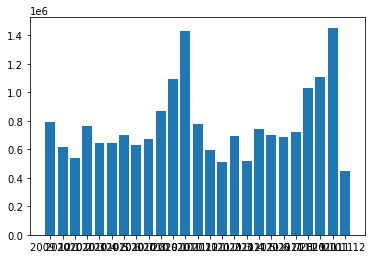

In [8]:
plt.bar(mdate_list,monthlysales)

<BarContainer object of 104 artists>

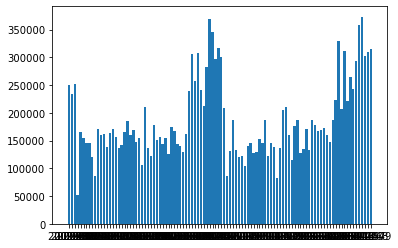

In [9]:
plt.bar(wdate_list,weeklysales)

<BarContainer object of 603 artists>

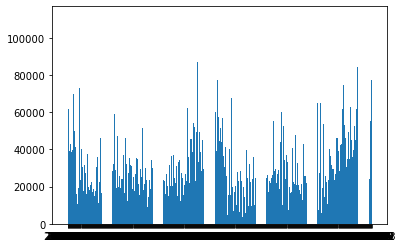

In [10]:
plt.bar(ddate_list,dailysales)

In [ ]:
#group sales by day

In [25]:
#save sales df as csv
datasales.to_csv('sales.csv')

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
X = dailysales
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.853534
p-value: 0.354226
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569


In [13]:
X = weeklysales
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.733226
p-value: 0.068463
Critical Values:
	1%: -3.496
	5%: -2.890
	10%: -2.582


In [14]:
X = monthlysales
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.734053
p-value: 0.003659
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682


{'whiskers': [<matplotlib.lines.Line2D at 0x2b9aa17f160>,
 'caps': [<matplotlib.lines.Line2D at 0x2b9aa17f700>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b9aa17efb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b9aa17fca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b9aa17ff70>],
 'means': []}

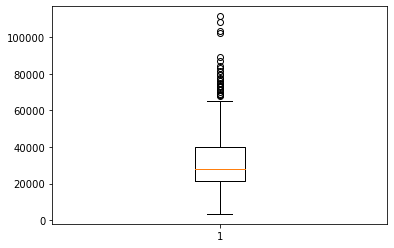

In [16]:
plt.boxplot(dailysales)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b9aa188d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2b9aa189330>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b9aa188ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b9aa1898d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b9aa189ba0>],
 'means': []}

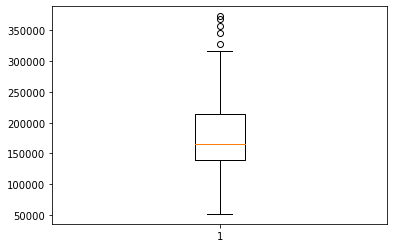

In [15]:
plt.boxplot(weeklysales)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b9ab9b4fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b9ab9b5540>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b9ab9b4cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b9ab9b5ae0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b9ab9b5db0>],
 'means': []}

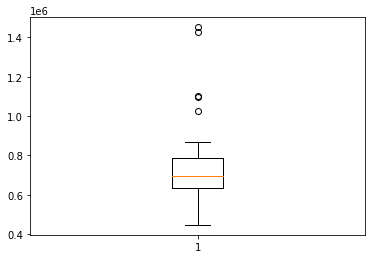

In [17]:
plt.boxplot(monthlysales)

In [23]:
prophetdf = pd.DataFrame()
prophetdf['ds'] = datasales['InvoiceDate'].dt.date
prophetdf['y'] = datasales['Sales']
#prophetdf = prophetdf.groupby(prophetdf['ds']).sum()

In [21]:
prophetdf.to_csv('prophetdf.csv')

In [24]:
from prophet import Prophet
